In [1]:
#importing of necessary libraries

import pandas as pd  
import numpy as np  
import seaborn as sns 
import pyreadstat 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import time as time

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/cleaned_fraud_data.csv')
df

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,transaction_count_per_user,transaction_velocity,hour_of_day,day_of_week
0,22058,1424818549000000000,2015-04-18 02:47:11,-0.160204,0.679914,7.327584e+08,0,1,0.0,2,5
1,333320,1433709590000000000,2015-06-08 01:38:54,-1.142592,2.304476,3.503114e+08,0,1,0.0,1,0
2,1359,1420138364000000000,2015-01-01 18:52:45,-1.197169,2.304476,2.621474e+09,1,1,0.0,18,3
3,150084,1430255605000000000,2015-05-04 13:54:50,0.385567,0.911994,3.840542e+09,0,1,0.0,13,0
4,221365,1437462592000000000,2015-09-09 18:40:53,0.112681,1.376155,4.155831e+08,0,1,0.0,18,2
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,1422327814000000000,2015-03-29 00:30:47,0.330990,-0.596528,3.451155e+09,1,1,0.0,0,6
151108,274471,1431711809000000000,2015-05-26 12:24:39,-0.105627,-0.132367,2.439047e+09,0,1,0.0,12,1
151109,368416,1425424051000000000,2015-05-20 07:07:47,0.167258,-0.828608,2.748471e+09,0,1,0.0,7,2
151110,207709,1436472367000000000,2015-09-07 09:34:46,0.494721,0.447833,3.601175e+09,0,1,0.0,9,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     151112 non-null  int64  
 1   signup_time                 151112 non-null  int64  
 2   purchase_time               151112 non-null  object 
 3   purchase_value              151112 non-null  float64
 4   age                         151112 non-null  float64
 5   ip_address                  151112 non-null  float64
 6   class                       151112 non-null  int64  
 7   transaction_count_per_user  151112 non-null  int64  
 8   transaction_velocity        151112 non-null  float64
 9   hour_of_day                 151112 non-null  int64  
 10  day_of_week                 151112 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 12.7+ MB


In [5]:
# Drop a single column from the DataFrame
df1 = df.drop('purchase_time', axis=1)

In [6]:
## displaying the counts of each taget value
df1['class'].value_counts()

class
0    136961
1     14151
Name: count, dtype: int64

In [7]:
# Separate features and target variable
target_column = 'class'
X = df1.drop(target_column, axis=1)  # Features
y = df1[target_column]               # Target variable

In [8]:
df1.fillna(X.mean(), inplace=True)  # Replace NaN with column means

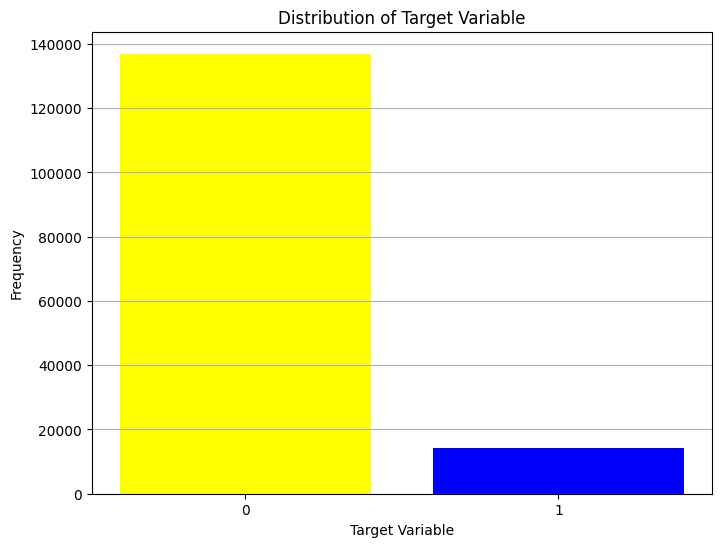

In [9]:
# visualize the target variable
# Define colors for each class
colors = ['yellow', 'blue']

# Count frequencies of each class
unique_classes, class_counts = np.unique(y, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

In [10]:
# Apply SMOTE to balance the dataset class variables 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

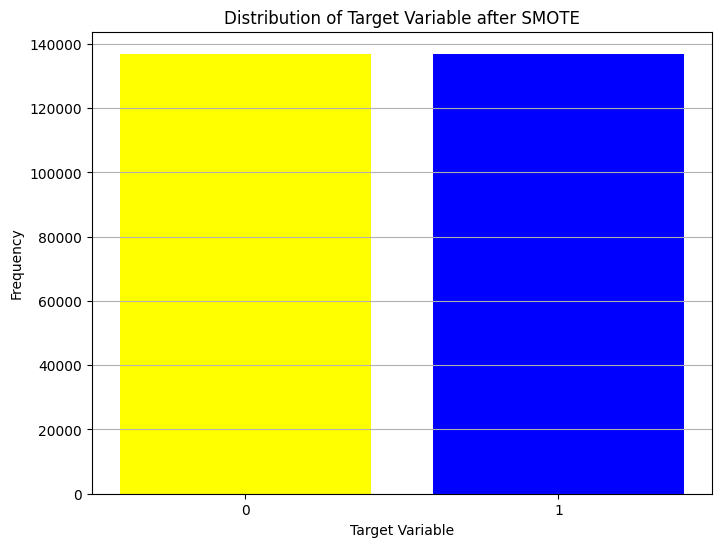

In [11]:
# Count frequencies of each class
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable after SMOTE')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

In [14]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
df1.columns

Index(['user_id', 'signup_time', 'purchase_value', 'age', 'ip_address',
       'class', 'transaction_count_per_user', 'transaction_velocity',
       'hour_of_day', 'day_of_week'],
      dtype='object')

In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif

# Define the feature columns (excluding the target column 'class')
feature_columns = ['user_id', 'signup_time', 'purchase_value', 'age', 'ip_address',
                   'transaction_count_per_user', 'transaction_velocity', 'hour_of_day', 'day_of_week']

# Assuming X_train is a DataFrame with the relevant feature columns
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=feature_columns)

# Now, calculate mutual information
mi = mutual_info_classif(X_train_imputed, y_train)

# Convert mutual information scores to a Pandas Series
mi = pd.Series(mi, index=feature_columns)

# Sort the Series by mutual information scores
mi_sorted = mi.sort_values(ascending=False)

# Display the sorted Series
print(mi_sorted)

signup_time                   0.278267
ip_address                    0.221339
purchase_value                0.176638
age                           0.168907
transaction_count_per_user    0.023173
day_of_week                   0.007790
hour_of_day                   0.004054
user_id                       0.000000
transaction_velocity          0.000000
dtype: float64


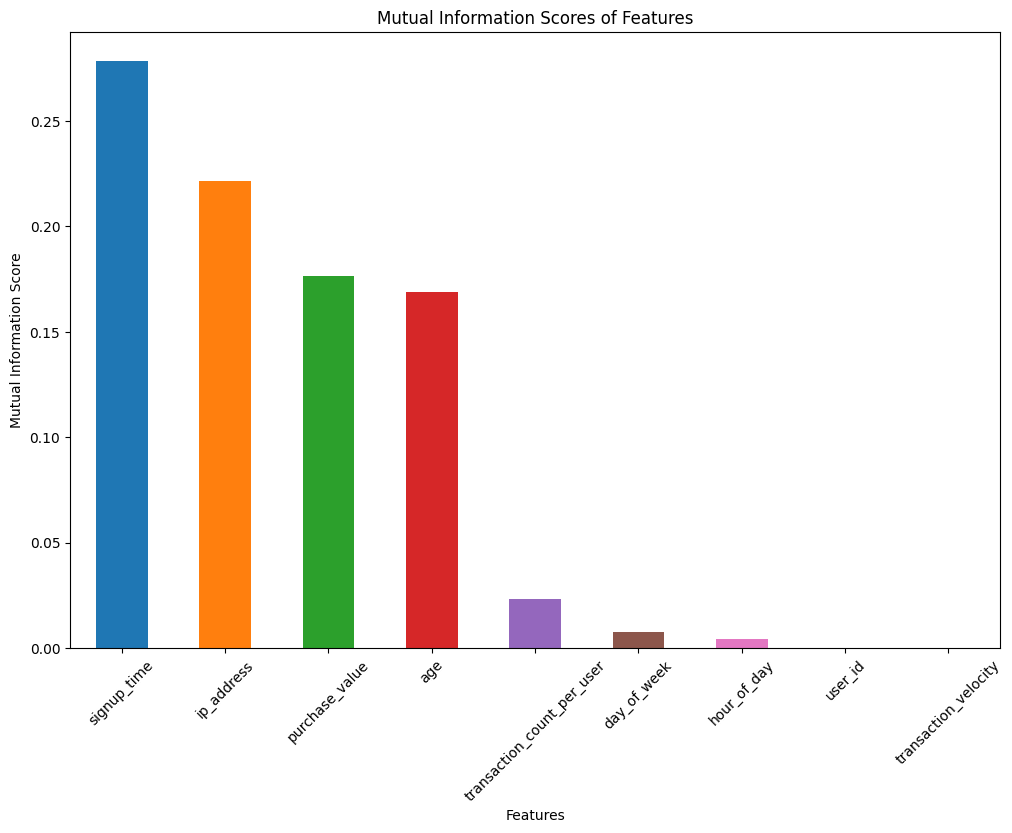

In [17]:
# Plot the sorted Series with different color palettes
palettes = sns.color_palette('tab10', n_colors=len(mi_sorted))
plt.figure(figsize=(12, 8))
mi_sorted.plot(kind='bar', color=palettes)
plt.title('Mutual Information Scores of Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the standardized training data
rf_clf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_clf.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.9141
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     20528
           1       0.96      0.87      0.91     20560

    accuracy                           0.91     41088
   macro avg       0.92      0.91      0.91     41088
weighted avg       0.92      0.91      0.91     41088

Test Accuracy: 0.9140
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     20437
           1       0.96      0.87      0.91     20652

    accuracy                           0.91     41089
   macro avg       0.92      0.91      0.91     41089
weighted avg       0.92      0.91      0.91     41089



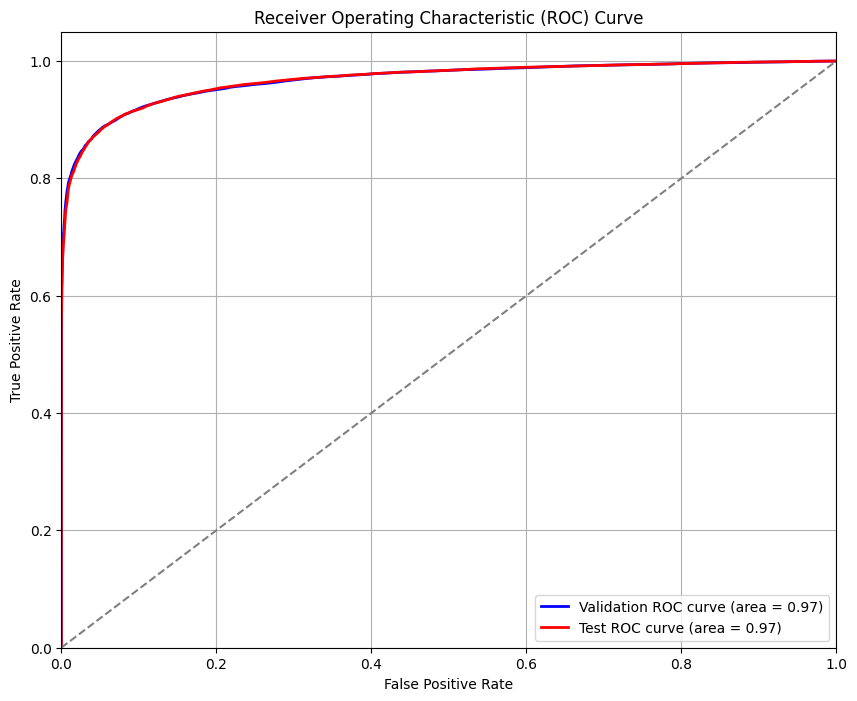

In [19]:
# Predict probabilities on the validation set
y_val_pred_prob = rf_clf.predict_proba(X_val)[:, 1]  # Get the probability of the positive class
# Predict probabilities on the test set
y_test_pred_prob = rf_clf.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [20]:
# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = dt.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.9134
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     20528
           1       0.91      0.92      0.91     20560

    accuracy                           0.91     41088
   macro avg       0.91      0.91      0.91     41088
weighted avg       0.91      0.91      0.91     41088

Test Accuracy: 0.9110
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     20437
           1       0.90      0.92      0.91     20652

    accuracy                           0.91     41089
   macro avg       0.91      0.91      0.91     41089
weighted avg       0.91      0.91      0.91     41089



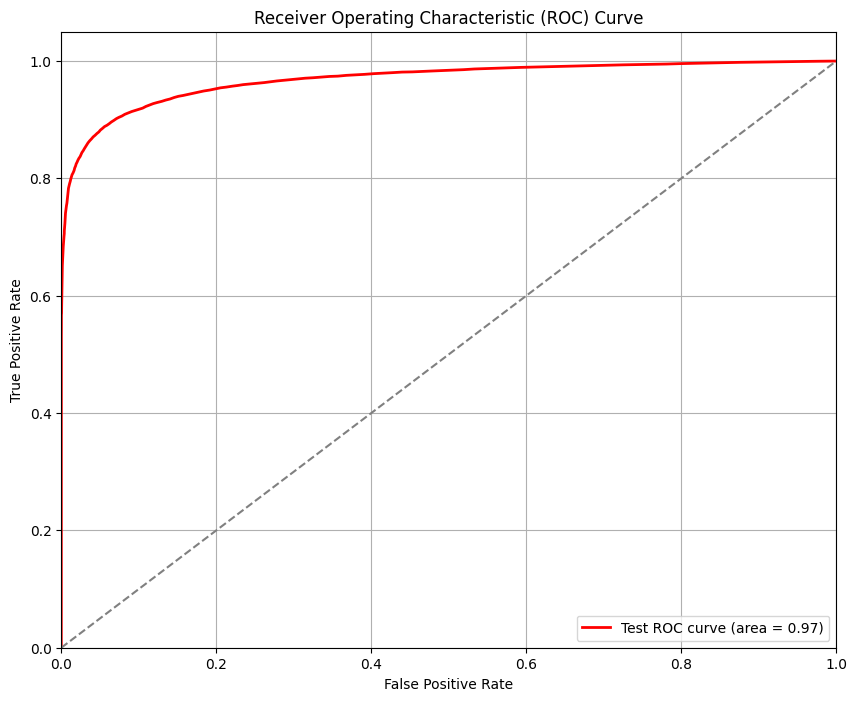

In [21]:
# Predict probabilities on the test set
y_test_pred_prob = rf_clf.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression


# Train Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.4996
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     20528
           1       0.00      0.00      0.00     20560

    accuracy                           0.50     41088
   macro avg       0.25      0.50      0.33     41088
weighted avg       0.25      0.50      0.33     41088

Test Accuracy: 0.4974
Test Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     20437
           1       0.00      0.00      0.00     20652

    accuracy                           0.50     41089
   macro avg       0.25      0.50      0.33     41089
weighted avg       0.25      0.50      0.33     41089



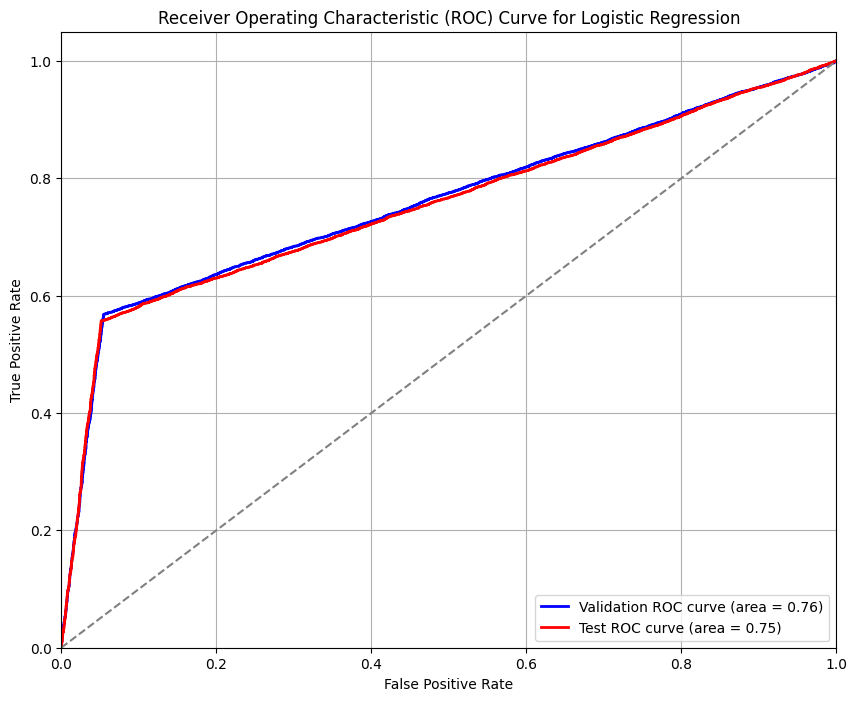

In [23]:
# Predict probabilities on the validation set for ROC
y_val_pred_prob = log_reg.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting classifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = gbm.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = gbm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.8415
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.85     20528
           1       0.92      0.75      0.83     20560

    accuracy                           0.84     41088
   macro avg       0.85      0.84      0.84     41088
weighted avg       0.85      0.84      0.84     41088

Test Accuracy: 0.8407
Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85     20437
           1       0.93      0.74      0.82     20652

    accuracy                           0.84     41089
   macro avg       0.85      0.84      0.84     41089
weighted avg       0.85      0.84      0.84     41089



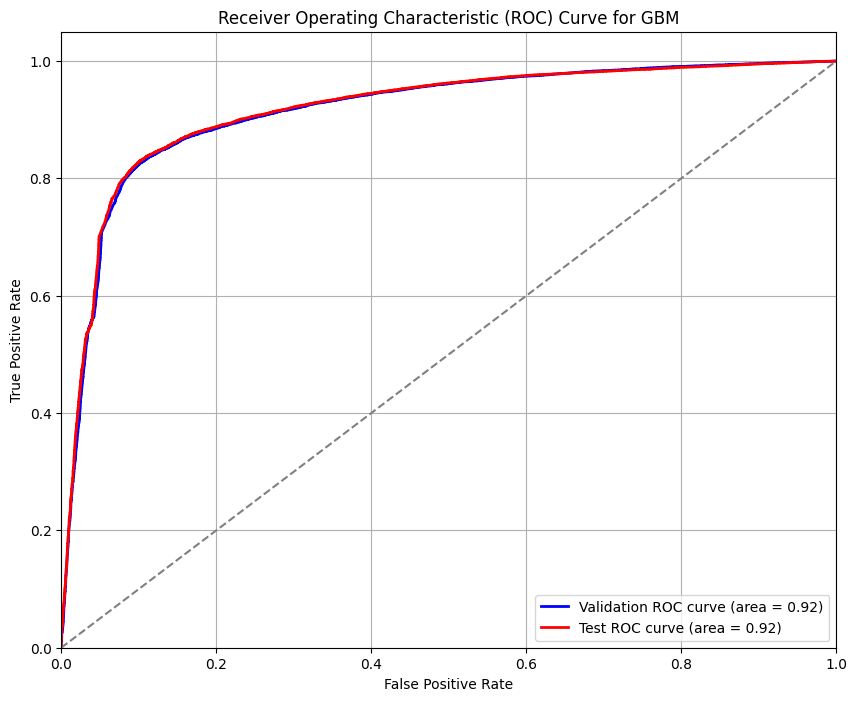

In [25]:
# Predict probabilities on the validation set for ROC
y_val_pred_prob = gbm.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = gbm.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GBM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [26]:
from sklearn.neural_network import MLPClassifier

# Train MLP classifier
mlp = MLPClassifier(random_state=42, max_iter=1000)  # Increased max_iter for convergence
mlp.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = mlp.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.5004
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     20528
           1       0.50      1.00      0.67     20560

    accuracy                           0.50     41088
   macro avg       0.25      0.50      0.33     41088
weighted avg       0.25      0.50      0.33     41088

Test Accuracy: 0.5026
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     20437
           1       0.50      1.00      0.67     20652

    accuracy                           0.50     41089
   macro avg       0.25      0.50      0.33     41089
weighted avg       0.25      0.50      0.34     41089



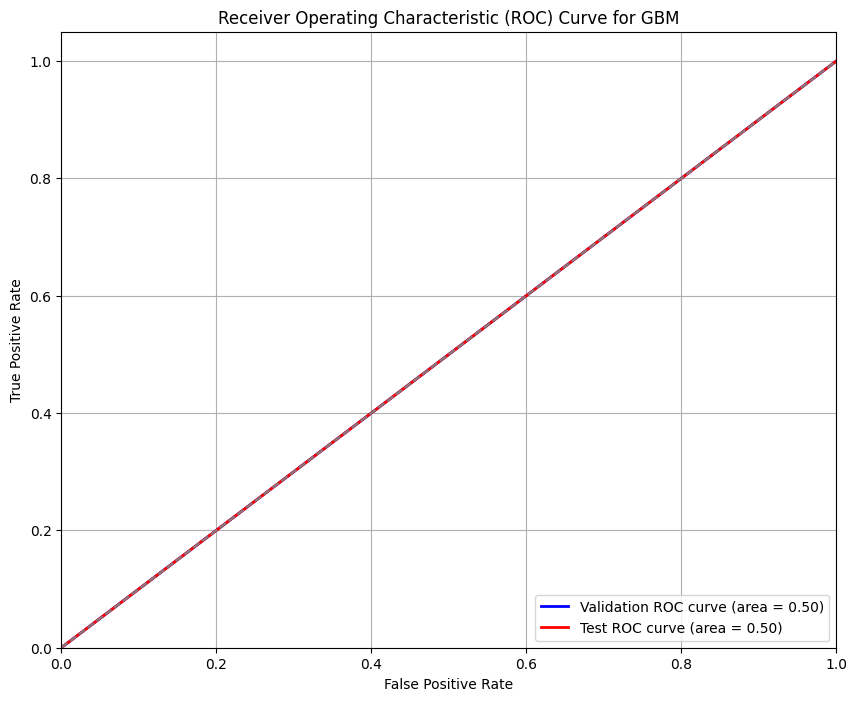

In [27]:
# Predict probabilities on the validation set for ROC
y_val_pred_prob = mlp.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = mlp.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GBM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Ensure the input data has the right shape (samples, timesteps, features)
X_train = np.expand_dims(X_train, axis=-1)  # Adding the feature dimension
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

In [29]:
# CNN Model
def build_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# RNN Model
def build_rnn(input_shape):
    model = Sequential()
    model.add(SimpleRNN(100, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [30]:
# Train and evaluate each model
models = {
    'CNN': build_cnn((X_train.shape[1], X_train.shape[2])),
    'RNN': build_rnn((X_train.shape[1], X_train.shape[2])),
    'LSTM': build_lstm((X_train.shape[1], X_train.shape[2]))
}

In [31]:
# Training loop
for model_name, model in models.items():
    print(f'\nTraining {model_name} model...')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)
    
    # Predict on the test set
    y_test_pred = (model.predict(X_test) > 0.5).astype(int).ravel()  # Threshold for binary classification
    
    # Evaluate the model
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    
    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}')
    print(f'{model_name} Test Classification Report:')
    print(test_report)


Training CNN model...
Epoch 1/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.4998 - loss: 698752121700352.0000 - val_accuracy: 0.4996 - val_loss: 1702.5680
Epoch 2/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5011 - loss: 304.5720 - val_accuracy: 0.4996 - val_loss: 0.6932
Epoch 3/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.5004 - val_loss: 0.6932
Epoch 4/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.4996 - val_loss: 0.6932
Epoch 5/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.5004 - val_loss: 0.6931
Epoch 6/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.5004 - val_loss: 0.6932
Epoch 7/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.4996 - val_loss: 0.6932
Epoch 8/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━